### Must Remember Points:  
**Only tensors of floating point data type can have require gradients**  
**Grad can only be created for scalar or single-valued outputs**  
**Enable eager execution when using tensorflow**  
**Keras preprocessing is the fastest way to load images and convert to arrays and back**  
**Computer PSNR Function and cv2.PSNR gives same value of PSNR**  
**As JPEG quality factor decreases SSIM and PNR drop**  
**JPEG2000 not compatible with OpenCV**  
**Common modes are “L” (luminance) for greyscale images, “RGB” for true color images, and “CMYK” for pre-press images**  
**Color mode(RGB or Grayscale) affects both PSNR and Structural Similarity**

In [635]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

import PIL.Image as pil_image

import io
import PIL

import cv2

In [446]:
import tensorflow as tf

In [457]:
import glob
import glymur
import skimage.metrics

In [448]:
import io
import math

In [7]:
tf.enable_eager_execution()

## OpenCV Implementations

In [518]:
a      = cv2.imread("BSR/BSDS500/data/images/test/100007.jpg",cv2.IMREAD_UNCHANGED)      #----->OpenCV shows incorrect coloring
a_grey = cv2.imread("BSR/BSDS500/data/images/test/100007.jpg",1)
b      = cv2.imread("BSR/BSDS500/data/images/test/100039.jpg",cv2.IMREAD_UNCHANGED)

In [519]:
print(a.shape)
print(b.shape)

(321, 481, 3)
(321, 481, 3)


In [520]:
rgb_score,image = metrics.structural_similarity(a,b,multichannel=True,full=True)  #--->Returns average of 3 channels in score

In [522]:
rgb_score 

0.1321569909751504

In [523]:
def compute_psnr(img1, img2):
    img1 = img1.astype(np.float64) / 255.
    img2 = img2.astype(np.float64) / 255.
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "Same Image"
    return 10 * math.log10(1. / mse)

In [524]:
compute_psnr(a,b)

8.409384539174138

In [525]:
compute_psnr(a,a_grey)

'Same Image'

In [526]:
cv2.PSNR(a,a_grey)

361.20199909921956

In [527]:
cv2.PSNR(a,b)

8.409384539174138

### Reading from Buffer

In [176]:
np_buffer = np.frombuffer(buffer.getvalue(),dtype=np.uint8)

In [168]:
np_buffer

array([255, 216, 255, ...,   3, 255, 217], dtype=uint8)

In [173]:
a_new = cv2.imdecode(np_buffer,cv2.IMREAD_COLOR)

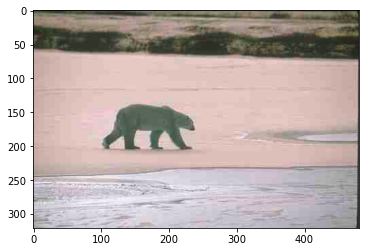

In [171]:
plt.imshow(a_new)

In [177]:
cv2.PSNR(a,a_new)

32.172383013234644

In [178]:
compute_psnr(a,a_new)

32.172383013234644

### Writing and Reading Buffer

In [249]:
_,new_buffer = cv2.imencode(".jpg", b)

In [250]:
io_buf = io.BytesIO(new_buffer)

In [251]:
decode_img = cv2.imdecode(np.frombuffer(io_buf.getbuffer(), np.uint8),cv2.IMREAD_COLOR)

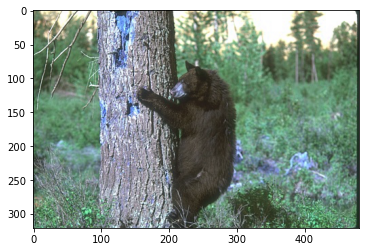

In [252]:
plt.imshow(decode_img)

In [253]:
compute_psnr(a,decode_img)

8.413432397411968

In [254]:
cv2.PSNR(a,decode_img)

8.413432397411967

In [255]:
a,b = metrics.structural_similarity(decode_img,b,multichannel=True,full=True)

In [256]:
a

0.9997032310871502

In [258]:
# Note there is a loss in structural similarity as well as PSNR

### BSD500 Experiments

In [285]:
boole , bsd_3 = cv2.imencode('.jpeg',cv2.imread("BSR/BSDS500/data/images/test/108004.jpg"),[cv2.IMWRITE_JPEG_QUALITY,20])

bsd_3_buf     = io.BytesIO(bsd_3)
bsd_3_decoded = cv2.imdecode(np.frombuffer(bsd_3_buf.getbuffer(), np.uint8),-1)

plt.imshow(bsd_3_decoded)

In [509]:
def decode_compare(img_path,jpeg_quality, plot = True):
    
    """If plot is false the actual images is are returned for SSIM and PSNR computation"""
    
    _, encoded_image = cv2.imencode('.jpeg',cv2.imread(img_path),[cv2.IMWRITE_JPEG_QUALITY,jpeg_quality])
    #TODO:Remove below if you don't want grayscale
    #_, encoded_image = cv2.imencode('.jpeg',cv2.imread(img_path,0),[cv2.IMWRITE_JPEG_QUALITY,jpeg_quality])
    encode_buffer = io.BytesIO(encoded_image)
    decoded_image = cv2.imdecode(np.frombuffer(encode_buffer.getbuffer(), np.uint8),-1)
    
    if plot == True:
        
        fig = plt.figure(figsize=(20,20))
        ax1 = plt.subplot(1,2,1,xticks=[] , yticks=[])
        ax1.set_title("Original Image")
        plt.imshow(cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB))  
        ax2 = plt.subplot(1,2,2,xticks=[] , yticks=[]) 
        ax2.set_title("JPEG Quality: " + str(jpeg_quality))
        plt.imshow(cv2.cvtColor(decoded_image, cv2.COLOR_BGR2RGB))
    
    else:
        return cv2.imread(img_path) , decoded_image

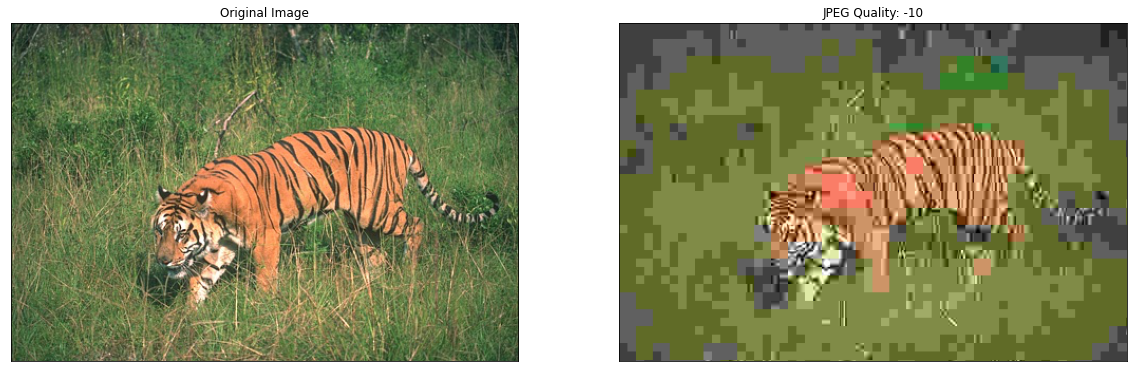

In [510]:
decode_compare("BSR/BSDS500/data/images/test/108004.jpg",-10)

In [338]:
a,b = decode_compare("BSR/BSDS500/data/images/test/108004.jpg",0,False)

In [339]:
compute_psnr(a,b)

19.06087830101412

In [340]:
cv2.PSNR(a,b)

19.060878301014117

In [341]:
metrics.structural_similarity(a,b,multichannel=True)

0.2754577135998902

In [485]:
parrot = 'LIVE1/monarch.bmp'
parrot_img = cv2.imread(parrot)

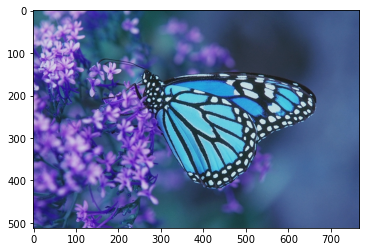

In [486]:
plt.imshow(parrot_img)

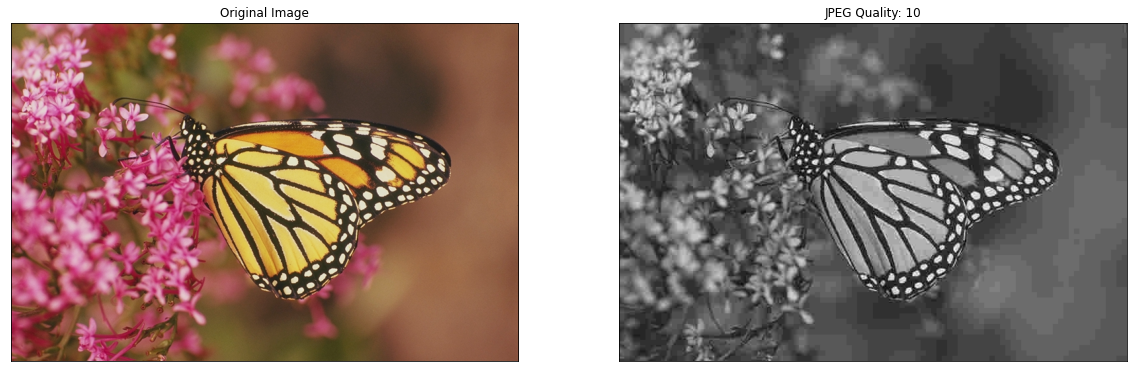

In [506]:
decode_compare(parrot,10)

In [511]:
parrot_a,parrot_b=decode_compare(parrot,10,False)

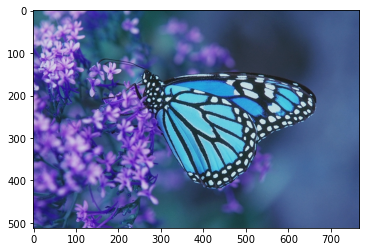

In [512]:
plt.imshow(parrot_a)

In [513]:
cv2.PSNR(parrot_a,parrot_b)

26.628177362226634

In [515]:
metrics.structural_similarity(parrot_a,parrot_b,multichannel=True)

0.8080288559560979

In [495]:
cv2.PSNR(parrot_a,parrot_b)

29.439920366917573

In [496]:
metrics.structural_similarity(parrot_a,parrot_b)

0.8697844825134453

## PIL Implementations

In [162]:
a_pil = pil_image.open("BSR/BSDS500/data/images/test/100007.jpg").convert('RGB')  #----->PIL shows correct coloring
b_pil = pil_image.open("BSR/BSDS500/data/images/test/100039.jpg").convert('RGB')

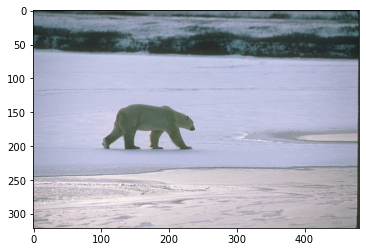

In [163]:
plt.imshow(a_pil)
plt.show()

In [ ]:
#rgb_pil_score = metrics.structural_similarity(a_pil,b_pil,multichannel=True)     #----->Can't use Skimage SSIM on PIL image

In [164]:
buffer = io.BytesIO()
a_pil.save(buffer,format='jpeg',quality=20)

In [165]:
a_pil_jpeg = pil_image.open(buffer)

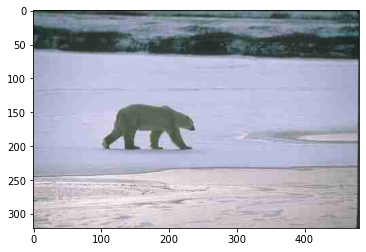

In [166]:
plt.imshow(a_pil_jpeg)
plt.show()

In [97]:
label_tf = tf.io.read_file("BSR/BSDS500/data/images/test/100007.jpg")
label_tf_2 = tf.io.read_file(baboon)

In [98]:
label = tf.io.decode_jpeg(label_tf, channels=3)

In [102]:
label_2 = tf.io.decode_bmp(label_tf_2)

In [259]:
pil_image.fromarray(label_2.numpy())

In [51]:
torch_label = torch.randint(255,size=(150,150),dtype=torch.uint8)

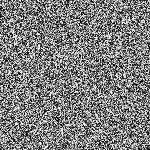

In [53]:
pil_image.fromarray(torch_label.numpy())

## Patch Extraction Scikit-Learn

In [533]:
import sklearn.feature_extraction as feature_extraction

In [547]:
patches = feature_extraction.image.extract_patches_2d(b,(24,24),233)

In [548]:
patches.shape

(233, 24, 24, 3)

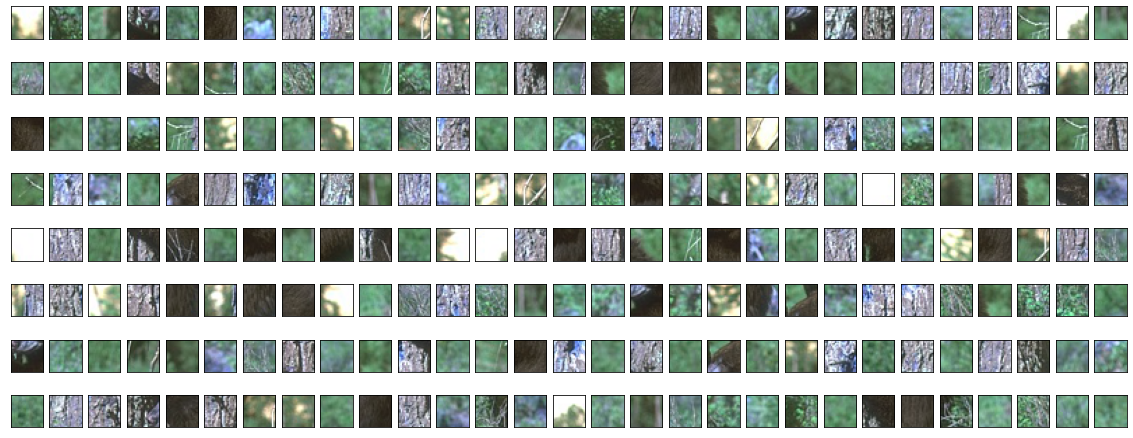

In [549]:
fig = plt.figure(figsize=(20,8))
for i in range(232):
    #a = vanilla_cnn.conv2.weight[i].cpu().detach().numpy()
    a = patches[i]
    img = np.squeeze(a) 
    ax = plt.subplot(8,29,i+1,xticks=[],yticks=[])
    ax.imshow(img)

## Color Space Conversions

In [667]:
import skimage

In [668]:
sk_img = skimage.io.imread('LIVE1/monarch.bmp')

In [670]:
sk_img[0][:3,:3]

array([[95, 90, 39],
       [98, 90, 41],
       [99, 90, 42]], dtype=uint8)

In [622]:
cp_image = cv2.imread('LIVE1/monarch.bmp')

In [623]:
cp_image_rgb = cv2.cvtColor(cp_image,cv2.COLOR_BGR2RGB)

In [624]:
cp_image_rgb[0][:3,:3]

array([[95, 90, 39],
       [98, 90, 41],
       [99, 90, 42]], dtype=uint8)

In [671]:
b = cp_image[:3,:3,0]      #------->B
b

array([[39, 41, 42],
       [52, 56, 57],
       [49, 51, 50]], dtype=uint8)

In [672]:
g = cp_image[:3,:3,1]     #-------->G
g 

array([[ 90,  90,  90],
       [103, 105, 106],
       [103, 102, 101]], dtype=uint8)

In [673]:
r = cp_image[:3,:3,2]    #-------->R
r

array([[ 95,  98,  99],
       [116, 119, 120],
       [121, 121, 120]], dtype=uint8)

In [662]:
cp_image_ycbcr = cv2.cvtColor(cp_image_rgb,cv2.COLOR_RGB2YCrCb)

In [663]:
cp_image_ycbcr[0][:3,:3]

array([[ 86, 134, 101],
       [ 87, 136, 102],
       [ 87, 137, 103]], dtype=uint8)

In [660]:
cp_image_yscbcr[0][:3,:3]

array([[ 86, 134, 101],
       [ 87, 136, 102],
       [ 87, 137, 103]], dtype=uint8)

In [674]:
0.299*r + 0.587*g + 0.114*b

array([[ 85.681,  86.806,  87.219],
       [101.073, 103.6  , 104.6  ],
       [102.226, 101.867, 100.867]])

In [595]:
cp_image_yscbcr[0][:3,:3]

array([[ 86, 134, 101],
       [ 87, 136, 102],
       [ 87, 137, 103]], dtype=uint8)

In [594]:
16. + (64.738 * r + 129.057 * g + 25.064 * b) / 256.

array([[ 58.42430469, 102.78376953, 114.37886719],
       [ 61.14239844, 103.53914453, 116.18497266],
       [ 61.49155078, 103.79039062, 116.534125  ]])

In [597]:
128. + (-37.945 * r - 74.494 * g + 112.439 * b) / 256.

array([[122.734875  , 122.29020703, 118.035375  ],
       [122.15289062, 121.85644531, 118.48004297],
       [122.44933594, 121.71367578, 118.77648828]])

In [598]:
128. + (112.439 * r - 94.154 * g - 18.285 * b) / 256.

array([[127.61089062, 128.92853516, 131.69601563],
       [126.8753125 , 127.75374219, 130.37837109],
       [125.99688281, 126.94673828, 129.49994141]])

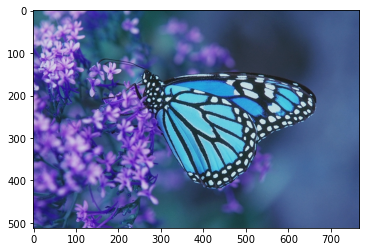

In [621]:
plt.imshow(cp_image)

In [652]:
image_pil = pil_image.open('LIVE1/monarch.bmp')

In [653]:
pil_image_array = np.asarray(image_pil)

In [641]:
pil_image_array[0][:3,:3]

array([[ 85, 101, 134],
       [ 86, 102, 136],
       [ 87, 102, 136]], dtype=uint8)

In [654]:
r_pil = pil_image_array[0][:3,:3]
r_pil

array([[95, 90, 39],
       [98, 90, 41],
       [99, 90, 42]], dtype=uint8)

In [655]:
g_pil = pil_image_array[1][:3,:3]
g_pil

array([[116, 103,  52],
       [119, 105,  56],
       [120, 106,  57]], dtype=uint8)

In [656]:
b_pil = pil_image_array[2][:3,:3]
b_pil

array([[121, 103,  49],
       [121, 102,  51],
       [120, 101,  50]], dtype=uint8)